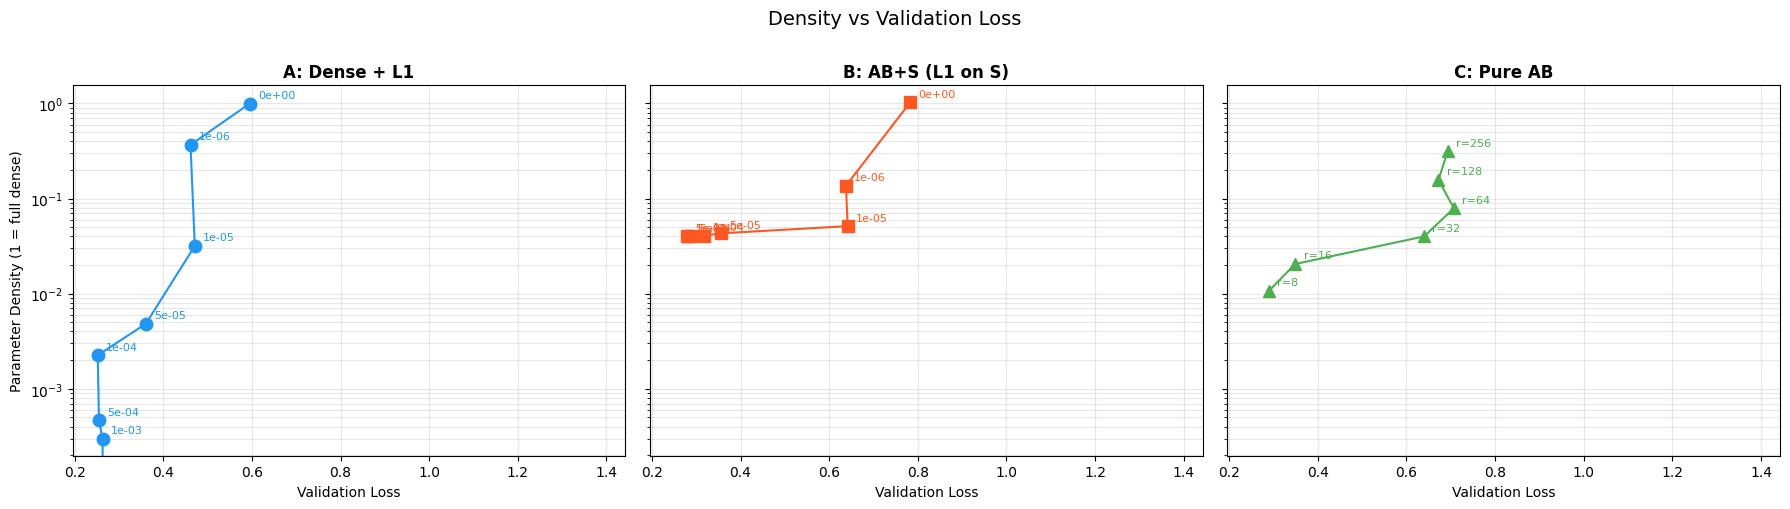

In [11]:
import json
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

RESULTS_DIR = Path("toy_data")

def load(exp):
    p = RESULTS_DIR / f"experiment_{exp.lower()}_results.json"
    return json.load(open(p)) if p.exists() else []

results_A = load("A")
results_B = load("B")
results_C = load("C")

# Collect all losses and sparsities to compute shared axis limits
all_loss, all_sp = [], []
datasets = []
for results, name, color, marker, param_key, fmt in [
    (results_A, "A: Dense + L1",    "#2196F3", "o", "l1_weight", lambda v: f"{v:.0e}"),
    (results_B, "B: AB+S (L1 on S)", "#FF5722", "s", "l1_weight", lambda v: f"{v:.0e}"),
    (results_C, "C: Pure AB",        "#4CAF50", "^", "rank",      lambda v: f"r={int(v)}"),
]:
    losses = [r["final_val_loss"] for r in results]
    densities = [1.0 - r.get("param_sparsity", r.get("final_sparsity", 0)) for r in results]
    labels = [fmt(r.get(param_key, 0)) for r in results]
    all_loss.extend(losses)
    all_sp.extend(densities)
    datasets.append((losses, densities, labels, name, color, marker))

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)

for ax, (losses, densities, labels, name, color, marker) in zip(axes, datasets):
    if losses:
        ax.plot(losses, densities, f"{marker}-", color=color, markersize=9, linewidth=1.5)
        for i, lbl in enumerate(labels):
            ax.annotate(lbl, (losses[i], densities[i]),
                        textcoords="offset points", xytext=(6, 4), fontsize=8, color=color)
    else:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes, fontsize=14)
    ax.set_title(name, fontsize=12, fontweight="bold")
    ax.set_xlabel("Validation Loss")
    ax.set_yscale("log")
    ax.grid(True, alpha=0.3, which="both")

axes[0].set_ylabel("Parameter Density (1 = full dense)")

plt.suptitle("Density vs Validation Loss", fontsize=14, y=1.01)
plt.tight_layout()
plt.savefig(str(RESULTS_DIR / "pareto_1x3.png"), dpi=150, bbox_inches="tight")
plt.show()

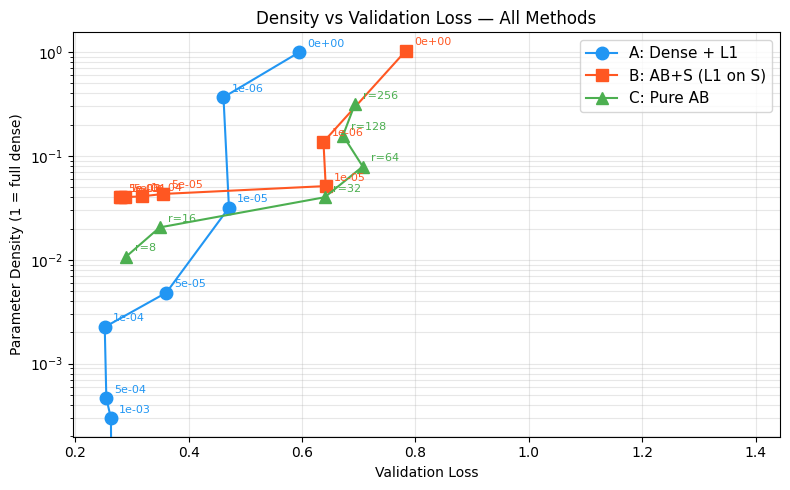

In [12]:
# Overlay: all experiments on one plot with legend
fig, ax = plt.subplots(figsize=(8, 5))

for losses, densities, labels, name, color, marker in datasets:
    if losses:
        ax.plot(losses, densities, f"{marker}-", color=color, markersize=9,
                linewidth=1.5, label=name)
        for i, lbl in enumerate(labels):
            ax.annotate(lbl, (losses[i], densities[i]),
                        textcoords="offset points", xytext=(6, 4), fontsize=8, color=color)

ax.set_xlabel("Validation Loss")
ax.set_ylabel("Parameter Density (1 = full dense)")
ax.set_yscale("log")
ax.set_title("Density vs Validation Loss — All Methods")
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.savefig(str(RESULTS_DIR / "pareto_overlay.png"), dpi=150, bbox_inches="tight")
plt.show()